In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import networkx as nx

df = pd.read_csv('bank.csv',sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [2]:
df.job.unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [3]:
df.age = df.age.apply(lambda x: 0 if x < 25 else(1 if x < 35 else(2 if x < 50 else(3 if x < 65 else 4))))

#df.job = df.job.apply(lambda x: 0 if x == 'unemployed' else(1 if x == 'services' \
#                            else(2 if x == 'management' else(3 if x == 'blue-collar' \
#                                else(4 if x == 'self-employed' else(5 if x == 'technician' \
#                                    else(6 if x == 'entrepreneur' else(7 if x == 'admin.' \
#                        else(8 if x =='student' else(9 if x == 'housemaid' \
#                            else(10 if x == 'retired' else 11)))))))))))

df.job = df.job.apply(lambda x: 0 if x == 'unemployed' or 'unknown' else(1 if x == 'services' \
                        or x == 'management' or x == 'admin.' else(2 if x == 'blue-collar' or x == 'technician' \
                                    or x == 'housemaid' else(3 if x == 'self-employed' or x == 'entrepreneur' \
                                        else(4 if x == 'student' else 5)))))


df.marital = df.marital.apply(lambda x: 0 if x == 'single' else(1 if x == 'married' else 2))

df.education = df.education.apply(lambda x: 0 if x == 'primary' else(1 if x == 'secondary' else(2 if x == 'tertiary' else 3)))

df.default = df.default.apply(lambda x: 0 if x == 'no' else 1)

df.balance = df.balance.apply(lambda x: 0 if x < 0 else(1 if x < 69. else(2 if x < 444. else(3 if x < 1480 else 4))))

df.housing = df.housing.apply(lambda x: 0 if x == 'no' else 1)

df.loan = df.loan.apply(lambda x: 0 if x == 'no' else 1)

df.contact = df.contact.apply(lambda x: 0 if x == 'telephone' else(1 if x == 'cellular' else 2))

df.duration = df.duration.apply(lambda x: 0 if x < 104. else(1 if x < 185 else(2 if x < 329 else 3)))

df.pdays = df.pdays.apply(lambda x: 0 if x < 50 else 0)

df.poutcome = df.poutcome.apply(lambda x: 0 if x == 'failure' else(1 if x == 'success' else 2))

df.y = df.y.apply(lambda x: 0 if x == 'no' else 1)

df.drop(columns = ['day','month'],inplace=True)


In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,1,0,1,0,0,4,0,0,1,0,1,0,0,2,0
1,1,0,1,1,0,4,1,1,1,2,1,0,4,0,0
2,2,0,0,2,0,3,1,0,1,2,1,0,1,0,0
3,1,0,1,2,0,3,1,1,2,2,4,0,0,2,0
4,3,0,1,1,0,1,1,0,2,2,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,1,0,1,1,0,0,1,0,1,3,5,0,0,2,0
4517,3,0,1,2,1,0,1,1,2,1,1,0,0,2,0
4518,3,0,1,1,0,2,0,0,1,1,11,0,0,2,0
4519,1,0,1,1,0,3,0,0,1,1,4,0,3,2,0


In [5]:
genvars = df.drop(columns=['previous','pdays','campaign','duration','contact','loan','default','poutcome'])
genvars

,age,job,marital,education,balance,housing,y
0,1,0,1,0,4,0,0
1,1,0,1,1,4,1,0
2,2,0,0,2,3,1,0
3,1,0,1,2,3,1,0
4,3,0,1,1,1,1,0
...,...,...,...,...,...,...,...
4516,1,0,1,1,0,1,0
4517,3,0,1,2,0,1,0
4518,3,0,1,1,2,0,0
4519,1,0,1,1,3,0,0


In [6]:
df.balance.unique()

array([4, 3, 1, 2, 0])

In [7]:
# age
age_alpha0 = 0.90
age_beta1 = 0.80
age_beta2 = 0.60
age_beta3 = 0.40
age_beta4 = 0.20

aff_age = np.array([[age_alpha0,age_beta1,age_beta2,age_beta3,age_beta4],
                    [age_beta1,age_alpha0,age_beta1,age_beta2,age_beta3],
                    [age_beta2,age_beta1,age_alpha0,age_beta1,age_beta2],
                    [age_beta3,age_beta2,age_beta1,age_alpha0,age_beta1],
                    [age_beta4,age_beta3,age_beta2,age_beta1,age_alpha0]])


# job

job_alpha0 = 0.90 # self
job_beta_wf = 0.60 # workforce
job_beta_nwf = 0.60 # not worforce

aff_job = np.array([[job_alpha0, job_beta_wf , job_beta_wf , job_beta_wf , job_beta_nwf, job_beta_nwf],
                    [job_beta_nwf, job_alpha0, job_beta_wf, job_beta_wf, job_beta_nwf, job_beta_nwf],
                    [job_beta_nwf, job_beta_wf, job_alpha0, job_beta_wf, job_beta_nwf, job_beta_nwf],
                    [job_beta_nwf, job_beta_wf, job_beta_wf, job_alpha0, job_beta_nwf, job_beta_nwf],
                    [job_beta_nwf, job_beta_wf, job_beta_wf, job_beta_wf, job_alpha0, job_beta_nwf],
                    [job_beta_nwf, job_beta_wf, job_beta_wf, job_beta_wf, job_beta_nwf, job_alpha0]])


# marital

mar_alpha0 = 0.85
mar_beta1 = 0.65

aff_mar = np.array([[mar_alpha0, mar_beta1, mar_beta1],
                    [mar_beta1, mar_alpha0, mar_beta1],
                    [mar_beta1, mar_beta1, mar_alpha0]])

# education
edu_alpha0 = 0.85
edu_beta1 = 0.70
edu_beta2 = 0.55
edu_beta3 = 0.40

aff_edu = np.array([[edu_alpha0,edu_beta1,edu_beta2,edu_beta3],
                    [edu_beta1,edu_alpha0,edu_beta1,edu_beta2],
                    [edu_beta2,edu_beta1,edu_alpha0,edu_beta1],
                    [edu_beta3,edu_beta2,edu_beta1,edu_alpha0]])


# balance
inc_alpha0 = 0.85
inc_beta1 = 0.70
inc_beta2 = 0.60
inc_beta3 = 0.50
inc_beta4 = 0.40
inc_beta5 = 0.25

aff_bal = np.array([[inc_alpha0,inc_beta1,inc_beta2,inc_beta3,inc_beta4],
                    [inc_beta1,inc_alpha0,inc_beta1,inc_beta2,inc_beta3],
                    [inc_beta2,inc_beta1,inc_alpha0,inc_beta1,inc_beta2],
                    [inc_beta3,inc_beta2,inc_beta1,inc_alpha0,inc_beta1],
                    [inc_beta4,inc_beta3,inc_beta2,inc_beta2,inc_alpha0]])

# housing
hous_alpha0 = 0.60
hous_beta1 = 0.40

aff_hous = np.array([[hous_alpha0,hous_beta1],
                     [hous_beta1,hous_alpha0]])

# outcome

y_alpha0 = 0.95
y_beta1 = 0.25

aff_y = np.array([[y_alpha0,y_beta1],
                  [y_beta1,y_alpha0]])

aff = {}
aff = {0:aff_age, 1:aff_job ,2:aff_mar ,3:aff_edu ,4:aff_bal ,5:aff_hous, 6:aff_y}

In [8]:
x = genvars.to_numpy()
x = x.astype(int)
x = x.T

P_u_v = np.empty((len(x.T),len(x.T)))
prob_u_v = np.empty((len(x),1))
u = np.empty((len(x),1))
v = np.empty((len(x),1))

# create probability for connection between u and v
for i in range(len(x.T)):
    u = x[:,i]

    for k in range(len(x.T)):
        v = x[:,k]

        for j in range(len(x)):
            aff_current = aff[j]
            prob_u_v[j] = aff_current[u[j],v[j]]

        P_u_v[i,k] = np.prod(prob_u_v) 

In [9]:
A = np.triu(P_u_v,0)

for i in range(len(P_u_v)):
    for j in range(len(P_u_v)):
        if A[i,j] > np.random.rand():
            A[i,j] = 1
        else:
            A[i,j] = 0


In [10]:
A = A + A.T - np.diag(np.diag(A))
np.sum(A) / 2

1082897.5

In [11]:
G = nx.from_numpy_matrix(A)

In [26]:
nx.is_connected(G)

True

In [ ]:
nx.draw(G,node_size=20)

In [12]:
features = pd.Series(df.y)

In [13]:
legend = features.to_dict()

In [14]:
color_map = []
for i in features.items():
    if i[1] == 0:
        color_map.append('blue')
    else:
        color_map.append('red')

In [ ]:
pos = nx.spring_layout(G)
nx.draw(G,pos,labels=features,node_size=20,node_color=color_map,with_labels=False)
plt.show()

In [15]:
import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F

G_dgl = dgl.from_networkx(G)
feat = df.drop(columns=['y'])

embedding = nn.Parameter(torch.tensor(feat.values,dtype=torch.float))

# embed = nn.Embedding(102, 5)  # 34 nodes with embedding dim equal to 5
G_dgl.ndata['feat'] =  embedding
G_dgl.ndata['train_mask'] = torch.zeros(len(G_dgl.nodes()), dtype=torch.bool).bernoulli(0.6)
G_dgl.ndata['label'] = torch.tensor(features)

Using backend: pytorch


In [16]:
G_dgl.ndata['val_mask'] = torch.empty(len(G_dgl.nodes()))
for i in range(len(G_dgl.ndata['train_mask'])):
    if G_dgl.ndata['train_mask'][i] == True:
        G_dgl.ndata['val_mask'][i] = False
    else:
        G_dgl.ndata['val_mask'][i] = True

G_dgl.ndata['val_mask'] = G_dgl.ndata['val_mask'].type(torch.bool)

In [17]:
# Contruct a two-layer GNN model
import dgl.nn as dglnn
import torch.nn as nn
import torch.nn.functional as F
class SAGE(nn.Module):
    def __init__(self, in_feats, hid_feats, out_feats):
        super().__init__()
        self.conv1 = dglnn.SAGEConv(
            in_feats=in_feats, out_feats=hid_feats, aggregator_type='mean')
        self.conv2 = dglnn.SAGEConv(
            in_feats=hid_feats, out_feats=out_feats, aggregator_type='mean')

    def forward(self, graph, inputs):
        # inputs are features of nodes
        h = self.conv1(graph, inputs)
        h = F.relu(h)
        h = self.conv2(graph, h)
        return h

In [18]:
def evaluate(model, graph, features, labels, mask):
    model.eval()
    with torch.no_grad():
        logits = model(graph, features)
        logits = logits[mask]
        labels = labels[mask]
        _, indices = torch.max(logits, dim=1)
        correct = torch.sum(indices == labels)
        return correct.item() * 1.0 / len(labels)

In [19]:
node_features = G_dgl.ndata['feat']
node_labels = G_dgl.ndata['label']
train_mask = G_dgl.ndata['train_mask']
valid_mask = G_dgl.ndata['val_mask']
n_features = node_features.shape[1]
n_labels = int(node_labels.max().item() + 1)

In [20]:
model = SAGE(in_feats=n_features, hid_feats=100, out_feats=n_labels)
opt = torch.optim.Adam(model.parameters())
plot_loss_train = []
plot_loss_val = []
for epoch in range(150):
    model.train()
    # forward propagation by using all nodes
    logits = model(G_dgl, node_features)
    # compute loss
    loss_train = F.cross_entropy(logits[train_mask], node_labels[train_mask])
    loss_val = F.cross_entropy(logits[valid_mask], node_labels[valid_mask])
    plot_loss_train.append(loss_train.item())
    plot_loss_val.append(loss_val.item())
    # compute validation accuracy
    acc = evaluate(model, G_dgl, node_features, node_labels, valid_mask)
    # backward propagation
    opt.zero_grad()
    loss_train.backward()
    opt.step()
    print(loss_train.item(),loss_val.item(),acc)

    # Save model if necessary.  Omitted in this example.

5.081360340118408 5.08181095123291 0.12099447513812155
4.429591178894043 4.431485176086426 0.12265193370165746
3.789508819580078 3.793052911758423 0.12375690607734807
3.167140245437622 3.1722071170806885 0.1281767955801105
2.572812795639038 2.5787317752838135 0.13259668508287292
2.0217344760894775 2.027794122695923 0.1397790055248619
1.5343228578567505 1.53978431224823 0.16795580110497238
1.1325911283493042 1.1371738910675049 0.2580110497237569
0.8320794105529785 0.8362196087837219 0.4591160220994475
0.6337890028953552 0.6381794214248657 0.6696132596685083
0.5226374268531799 0.5277464389801025 0.8160220994475138
0.47457414865493774 0.4806637465953827 0.8707182320441988
0.46590447425842285 0.47317346930503845 0.8823204419889503
0.4787522554397583 0.48733243346214294 0.8828729281767956
0.5015820860862732 0.5115821957588196 0.8828729281767956
0.527751088142395 0.5391941070556641 0.8828729281767956
0.5536396503448486 0.5664606690406799 0.8828729281767956
0.5773593187332153 0.59148406982421

0.2500969171524048 0.2688119411468506 0.888950276243094
0.24892865121364594 0.26760897040367126 0.8900552486187845
0.24776515364646912 0.26640379428863525 0.8895027624309392
0.24661023914813995 0.26519790291786194 0.8900552486187845
0.24545809626579285 0.26399344205856323 0.8906077348066298
0.24430988729000092 0.26279592514038086 0.8906077348066298


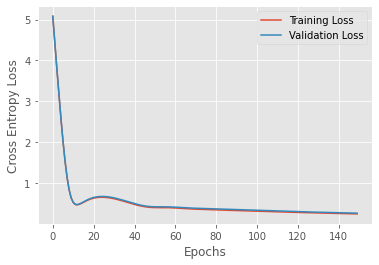

In [21]:
plt.plot(plot_loss_train,label='Training Loss')
plt.plot(plot_loss_val,label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix
val_tens = torch.tensor(features)
_, indices_val = torch.max(logits[valid_mask], dim=1)
val_lab = val_tens[valid_mask]
train_lab = val_tens[train_mask]
_, indices_train = torch.max(logits[train_mask], dim=1)

print('Classification Accuracy validation set {}'.format(accuracy_score(val_lab,indices_val)))
print('-------------------------------------------------------------')
print('Classification Accuracy training set {}'.format(accuracy_score(train_lab,indices_train)))
print('-------------------------------------------------------------')
print('Confusion Matrix validation set:')
print(confusion_matrix(val_lab, indices_val))
print('-------------------------------------------------------------')
print('Confusion Matrix training set:')
print(confusion_matrix(train_lab,indices_train))

Classification Accuracy validation set 0.8906077348066298
-------------------------------------------------------------
Classification Accuracy training set 0.8985614164514939
-------------------------------------------------------------
Confusion Matrix validation set:
[[1589    9]
 [ 189   23]]
-------------------------------------------------------------
Confusion Matrix training set:
[[2386   16]
 [ 259   50]]


In [23]:
from sklearn.model_selection import train_test_split
y =  df.y
x = df.drop(columns='y')
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, shuffle=True)

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
x_train_tf = tf.convert_to_tensor(x_train)
x_test_tf = tf.convert_to_tensor(x_test)
y_train_tf = tf.convert_to_tensor(y_train)
y_test_tf = tf.convert_to_tensor(y_test)

model = Sequential()

model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train_tf, y_train_tf,validation_data=(x_test_tf,y_test_tf), epochs=50, batch_size=5)

Epoch 1/50
724/724 [==============================] - 3s 3ms/step - loss: 0.4218 - accuracy: 0.8285 - val_loss: 0.2856 - val_accuracy: 0.8829
Epoch 2/50
724/724 [==============================] - 1s 2ms/step - loss: 0.2822 - accuracy: 0.8881 - val_loss: 0.2737 - val_accuracy: 0.8873
Epoch 3/50
724/724 [==============================] - 1s 2ms/step - loss: 0.2805 - accuracy: 0.8841 - val_loss: 0.2659 - val_accuracy: 0.8851
Epoch 4/50
724/724 [==============================] - 1s 1ms/step - loss: 0.2782 - accuracy: 0.8890 - val_loss: 0.2636 - val_accuracy: 0.8873
Epoch 5/50
724/724 [==============================] - 1s 1ms/step - loss: 0.2705 - accuracy: 0.8899 - val_loss: 0.2654 - val_accuracy: 0.8873
Epoch 6/50
724/724 [==============================] - 1s 1ms/step - loss: 0.2704 - accuracy: 0.8885 - val_loss: 0.2644 - val_accuracy: 0.8895
Epoch 7/50
724/724 [==============================] - 1s 2ms/step - loss: 0.2593 - accuracy: 0.8946 - val_loss: 0.2640 - val_accuracy: 0.8884
Epoch 

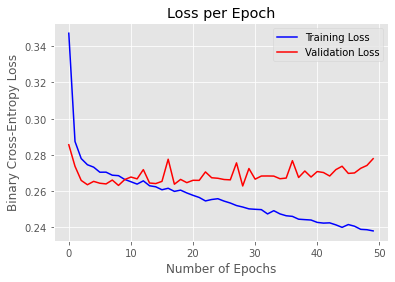

In [25]:
plt.plot(history.history['loss'],label = 'Training Loss', color = 'blue')
plt.plot(history.history['val_loss'],label = 'Validation Loss', color = 'red')
plt.xlabel('Number of Epochs')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.show()